In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib
%matplotlib inline

In [7]:
# fetch MNIST datasets
#from six.moves import urllib
#from sklearn.datasets import fetch_mldata
#try:
#    mnist = fetch_mldata('MNIST original')
#except urllib.error.HTTPError as ex:
#    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
#    from scipy.io import loadmat
#   mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
#    mnist_path = "./mnist-original.mat"
#    response = urllib.request.urlopen(mnist_alternative_url)
#    with open(mnist_path, "wb") as f:
#        content = response.read()
#        f.write(content)
#    mnist_raw = loadmat(mnist_path)
#    mnist = {
#        "data": mnist_raw["data"].T,
#        "target": mnist_raw["label"][0],
#        "COL_NAMES": ["label", "data"],
#        "DESCR": "mldata.org dataset: mnist-original",
#    }
#    print("Success!")

In [8]:
import scipy.io as sio
mnist_raw = sio.loadmat('mnist-original.mat')
mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
X, y = mnist["data"], mnist["target"]
X.shape # data dimension

(70000, 784)

In [9]:
y.shape # target value dimension

(70000,)

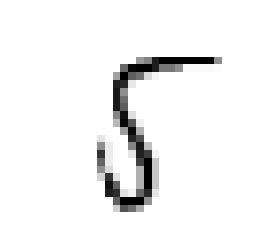

In [10]:
some_digit = X[34000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
y[34000]

5.0

In [12]:
# split train and test data set
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [13]:
# shuffle the indexes of X-train
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [14]:
# train  a binary classifier with taking only one digit, let it be 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
# train binary classfier using stochastic gradient descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/home/alok-kumar/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [16]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

## Perfomance measure using crossvalidation with accuracy score

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9356 ,  0.91765,  0.9593 ])

In [18]:
from sklearn.base import BaseEstimator ## classify every image into not 5 
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.90805,  0.91   ,  0.9109 ])

## confusion matrix performance measure

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [21]:
# let'd try confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[51719,  2860],
       [  889,  4532]])

In [22]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])